In [2]:
import numpy
import cv2

In [14]:
import matplotlib.pyplot as plt

In [133]:
igm = cv2.imread("gato.jpg")
igm = cv2.cvtColor(igm, cv2.COLOR_BGR2RGB)

igm_1 = cv2.imread("cat.jpg")
#igm_1 = cv2.cvtColor(igm_1, cv2.COLOR_BGR2RGB)


img_2 = cv2.imread("pac.png")
#img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)


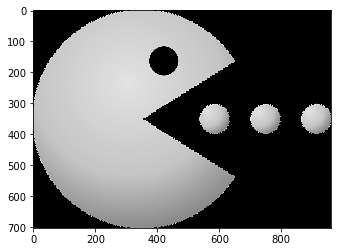

In [134]:
#img_2 = cv2.imread("gato.jpg")
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(img_2,cv2.COLOR_RGB2GRAY)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_GRAY2RGB)
plt.imshow(img_2)
plt.show() 

In [123]:
def convolution2D(f,h):                              # Convolucion discreta usando numpy
    fS, hS = f.shape, h.shape                        # Obtenemos el tamano de la mascara y la imagen
    F = numpy.zeros(shape=fS)                        # Creamos el arreglo donde se guardaran los calculos
    for x in range(fS[0]):                           # Recorremos la imagen a lo alto
        #print str(round(float(x*100.0/fS[0]),2))    # Imprimimos el progreso de la rutina
        for y in range(fS[1]):                       # Recorremos la imagen a lo ancho
            mSum = numpy.array([0.0, 0.0, 0.0])      # Inicializamos la sumatoria en cero   
            for i in range(hS[0]):                   # Recorremos la mascara a lo alto
                i1 = i-(hS[0]/2)                     # Centramos la mascara a lo alto
                for j in range(hS[1]):               # Recorremos la mascara a lo ancho
                    j2 = j-(hS[0]/2)                 # Centramos la mascara a lo ancho  
                    try:                             # Realizamos la sumatoria de los valores
                        mSum += f[x+i1,y+j2]*h[i,j]/(h.size)  # Los bloques try, catch ayudan en a evitar errores
                    except IndexError: pass          # cuando estamos en los pixeles de las orillas
            F[x,y] = mSum                         # Agregamos el nuevo valor al arreglo de la gradiente
            
    plt.imshow(F)
    plt.show()    

In [137]:
kernel = numpy.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [125]:
kernel

array([[ 1,  2,  1],
       [ 2,  0,  2],
       [-1, -2, -1]])

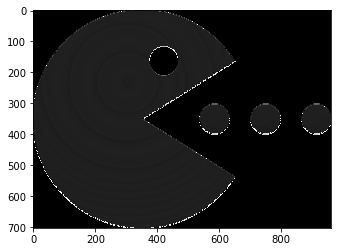

In [139]:
convolution2D(img_2, kernel)

### OPENCV

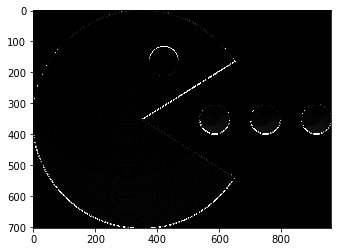

In [138]:
filtered = cv2.filter2D(src=img_2, kernel=kernel, ddepth=-1)
plt.imshow(filtered)
plt.show()  